In [2]:
import pandas as pd

# Replace 'url' with the actual link to your CSV file
url = "youth_unemployment_global.csv"
df = pd.read_csv(url)

here we loading the data and we are visualising and then after classifying before we want ot clean

In [9]:
df.head()

,Country,CountryCode,Year,YouthUnemployment
0,Africa Eastern and Southern,ZH,2024,13.283002
1,Africa Eastern and Southern,ZH,2023,13.367810
2,Africa Eastern and Southern,ZH,2022,13.620217
3,Africa Eastern and Southern,ZH,2021,14.955182
4,Africa Eastern and Southern,ZH,2020,14.997030


In [5]:
df.shape

(17290, 4)

In [7]:
df.describe()

,Year,YouthUnemployment
count,17290.000000,7981.000000
mean,1992.000000,16.667732
std,18.762206,11.567954
min,1960.000000,0.295000
25%,1976.000000,8.531000
50%,1992.000000,14.182000
75%,2008.000000,22.031000
max,2024.000000,82.409000


In [8]:
df.isnull().sum()

Country                 0
CountryCode            65
Year                    0
YouthUnemployment    9309
dtype: int64

checks every cell in the DataFrame for missing values (represented by True for missing or False for not missing) and then sums the True values for each column. This output tells you exactly how many missing values are in each column.

In [10]:
df_clean = df.dropna(subset=['CountryCode', 'YouthUnemployment'])
df_clean.isnull().sum()
print(df_clean.head())

                       Country CountryCode  Year  YouthUnemployment
0  Africa Eastern and Southern          ZH  2024          13.283002
1  Africa Eastern and Southern          ZH  2023          13.367810
2  Africa Eastern and Southern          ZH  2022          13.620217
3  Africa Eastern and Southern          ZH  2021          14.955182
4  Africa Eastern and Southern          ZH  2020          14.997030


In [11]:
unique_country_codes = df_clean['CountryCode'].unique()
print(unique_country_codes)
df_clean = df_clean.copy()

['ZH' 'ZI' '1A' 'S3' 'B8' 'V2' 'Z4' '4E' 'T4' 'XC' 'Z7' '7E' 'T7' 'EU'
 'F1' 'XE' 'XD' 'XF' 'ZT' 'XH' 'XI' 'XG' 'V3' 'ZJ' 'XJ' 'T2' 'XL' 'XO'
 'XM' 'XN' 'ZQ' 'XQ' 'T3' 'XP' 'XU' 'OE' 'S4' 'S2' 'V4' 'V1' 'S1' '8S'
 'T5' 'ZG' 'ZF' 'T6' 'XT' '1W' 'AF' 'AL' 'DZ' 'AO' 'AR' 'AM' 'AU' 'AT'
 'AZ' 'BS' 'BH' 'BD' 'BB' 'BY' 'BE' 'BZ' 'BJ' 'BT' 'BO' 'BA' 'BW' 'BR'
 'BN' 'BG' 'BF' 'BI' 'CV' 'KH' 'CM' 'CA' 'CF' 'TD' 'JG' 'CL' 'CN' 'CO'
 'KM' 'CD' 'CG' 'CR' 'CI' 'HR' 'CU' 'CY' 'CZ' 'DK' 'DJ' 'DO' 'EC' 'EG'
 'SV' 'GQ' 'ER' 'EE' 'SZ' 'ET' 'FJ' 'FI' 'FR' 'PF' 'GA' 'GM' 'GE' 'DE'
 'GH' 'GR' 'GU' 'GT' 'GN' 'GW' 'GY' 'HT' 'HN' 'HK' 'HU' 'IS' 'IN' 'ID'
 'IR' 'IQ' 'IE' 'IL' 'IT' 'JM' 'JP' 'JO' 'KZ' 'KE' 'KP' 'KR' 'KW' 'KG'
 'LA' 'LV' 'LB' 'LS' 'LR' 'LY' 'LT' 'LU' 'MO' 'MG' 'MW' 'MY' 'MV' 'ML'
 'MT' 'MR' 'MU' 'MX' 'MD' 'MN' 'ME' 'MA' 'MZ' 'MM' 'NP' 'NL' 'NC' 'NZ'
 'NI' 'NE' 'NG' 'MK' 'NO' 'OM' 'PK' 'PA' 'PG' 'PY' 'PE' 'PH' 'PL' 'PT'
 'PR' 'QA' 'RO' 'RU' 'RW' 'WS' 'ST' 'SA' 'SN' 'RS' 'SL' 'SG' 'SK' 'SI'
 'SB' 

In [12]:
# Convert 'Year' to integer type
df_clean['Year'] = df_clean['Year'].astype(int)

# Verify the data types
print(df_clean.dtypes)

Country               object
CountryCode           object
Year                   int32
YouthUnemployment    float64
dtype: object


In [13]:
# Create dummy variables for 'CountryCode'
df_encoded = pd.get_dummies(df_clean, columns=['CountryCode'], prefix='CC')

# Drop the original 'Country' column as 'CountryCode' is encoded
df_encoded = df_encoded.drop(columns=['Country'])

print("\nData after One-Hot Encoding (First 5 Rows):")
print(df_encoded.head())
print(f"Final shape after encoding: {df_encoded.shape}")


Data after One-Hot Encoding (First 5 Rows):
   Year  YouthUnemployment  CC_1A  CC_1W  CC_4E  CC_7E  CC_8S  CC_AE  CC_AF  \
0  2024          13.283002  False  False  False  False  False  False  False   
1  2023          13.367810  False  False  False  False  False  False  False   
2  2022          13.620217  False  False  False  False  False  False  False   
3  2021          14.955182  False  False  False  False  False  False  False   
4  2020          14.997030  False  False  False  False  False  False  False   

   CC_AL  ...  CC_ZA  CC_ZF  CC_ZG  CC_ZH  CC_ZI  CC_ZJ  CC_ZM  CC_ZQ  CC_ZT  \
0  False  ...  False  False  False   True  False  False  False  False  False   
1  False  ...  False  False  False   True  False  False  False  False  False   
2  False  ...  False  False  False   True  False  False  False  False  False   
3  False  ...  False  False  False   True  False  False  False  False  False   
4  False  ...  False  False  False   True  False  False  False  False  False   


In [14]:
# here visualising
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style for all subsequent plots
sns.set_style("whitegrid")

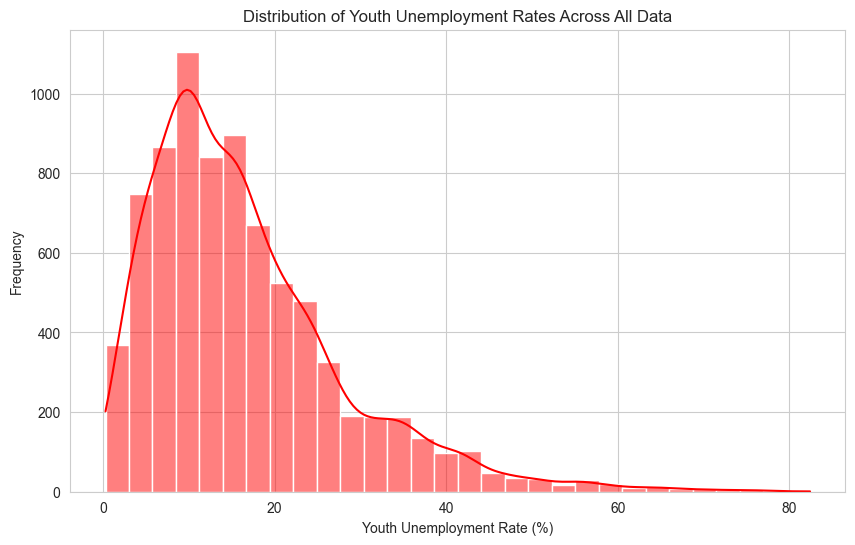

In [17]:
# Plot 1: Histogram showing the distribution
plt.figure(figsize=(10, 6))
# A histogram with a Kernel Density Estimate (KDE) curve shows the shape of the data
sns.histplot(df_clean['YouthUnemployment'], bins=30, kde=True, color='red')
plt.title('Distribution of Youth Unemployment Rates Across All Data')
plt.xlabel('Youth Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

Problem: Since most of your 17,000+ data points have low unemployment rates, the model (especially a regression model trying to predict the rate) will learn to minimize the error for the majority of the data (the low rates).

Result: The model will become very good at predicting low and moderate unemployment rates but will likely perform poorly and have high errors when trying to predict the rare, extreme high unemployment rates (the outliers above 40% or 60%). The model essentially "ignores" the rare cases because minimizing error on them doesn't significantly impact the overall loss function.

In [18]:
# so log of the data
import numpy as np

# Apply the natural logarithm transformation (log base e)
# We add a small constant (1) to handle potential zero values gracefully,
# as log(0) is undefined. However, unemployment rates are usually > 0.
df_clean['Log_YouthUnemployment'] = np.log1p(df_clean['YouthUnemployment'])

# Check the first few rows to see the new transformed values
print("--- Data after Log Transformation ---")
print(df_clean[['YouthUnemployment', 'Log_YouthUnemployment']].head())

# Optional: Re-run the histogram visualization code (from previous steps)
# on 'Log_YouthUnemployment' to visually verify the normalization.
#

--- Data after Log Transformation ---
   YouthUnemployment  Log_YouthUnemployment
0          13.283002               2.659070
1          13.367810               2.664990
2          13.620217               2.682405
3          14.955182               2.769784
4          14.997030               2.772403


In [19]:
from sklearn.preprocessing import StandardScaler

# Identify the numerical features that need scaling (excluding the log feature)
numerical_features = ['Year', 'YouthUnemployment']

# 1. Initialize the StandardScaler
scaler = StandardScaler()

# 2. Fit the scaler to the data and transform the data
# We create a new DataFrame for the scaled values
df_scaled = df_clean.copy()
df_scaled[numerical_features] = scaler.fit_transform(df_scaled[numerical_features])

print("\n--- Data after Standard Scaling (Numerical Features) ---")
print(df_scaled[['Year', 'YouthUnemployment']].head())


--- Data after Standard Scaling (Numerical Features) ---
       Year  YouthUnemployment
0  1.685251          -0.285859
1  1.583226          -0.278475
2  1.481201          -0.256497
3  1.379177          -0.140259
4  1.277152          -0.136616


In [20]:
# Assuming you already ran this from the previous steps:
df_encoded = pd.get_dummies(df_clean, columns=['CountryCode'], prefix='CC')
df_encoded = df_encoded.drop(columns=['Country'])

# 1. Select the relevant features from the scaled/transformed DataFrames
features_for_model = df_encoded.drop(columns=['YouthUnemployment']) # Drop the original target
features_for_model['Scaled_YouthUnemployment'] = df_scaled['YouthUnemployment'] # Add the scaled version
features_for_model['Log_YouthUnemployment'] = df_clean['Log_YouthUnemployment'] # Add the log version

# 2. Display the columns ready for the final model
print("\n--- Final Features Ready for Modeling ---")
print(features_for_model.dtypes)
print(f"\nFinal Feature Shape: {features_for_model.shape}")


--- Final Features Ready for Modeling ---
Year                          int32
Log_YouthUnemployment       float64
CC_1A                          bool
CC_1W                          bool
CC_4E                          bool
                             ...   
CC_ZM                          bool
CC_ZQ                          bool
CC_ZT                          bool
CC_ZW                          bool
Scaled_YouthUnemployment    float64
Length: 237, dtype: object

Final Feature Shape: (7947, 237)


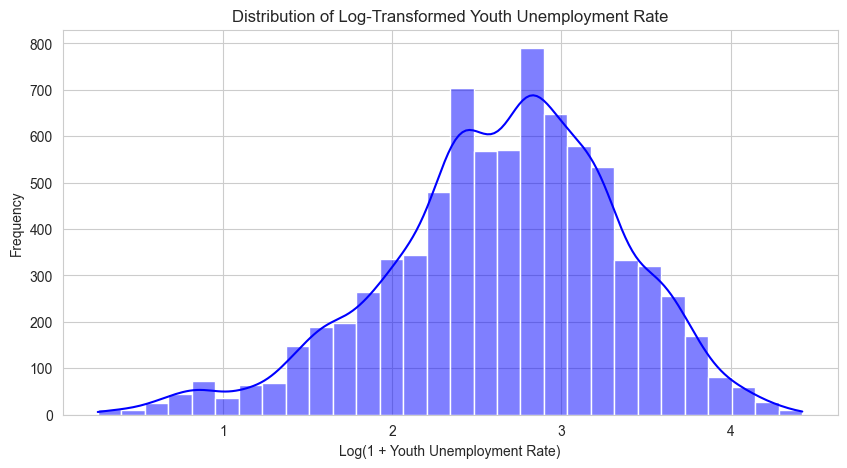

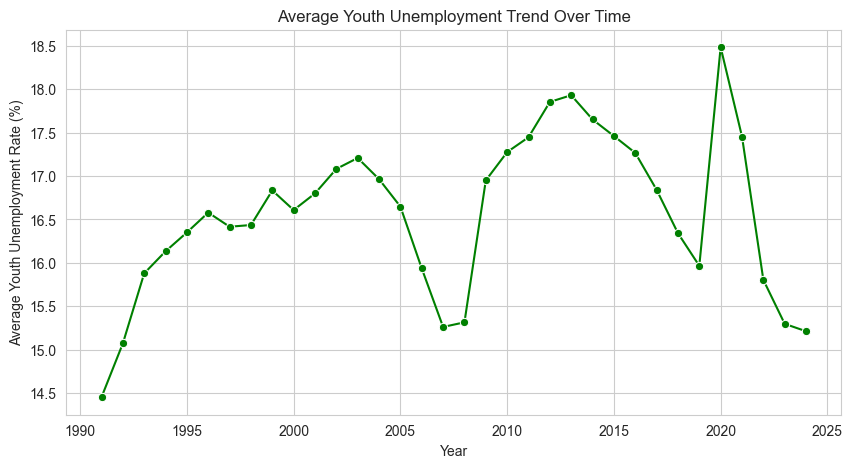

In [23]:
# Histogram of Log-Transformed Rate
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['Log_YouthUnemployment'], bins=30, kde=True, color='blue')
plt.title('Distribution of Log-Transformed Youth Unemployment Rate')
plt.xlabel('Log(1 + Youth Unemployment Rate)')
plt.ylabel('Frequency')
plt.show()

# Time Series Trend
annual_avg_unemployment = df_clean.groupby('Year')['YouthUnemployment'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=annual_avg_unemployment, x='Year', y='YouthUnemployment', marker='o', color='green')
plt.title('Average Youth Unemployment Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Average Youth Unemployment Rate (%)')
plt.grid(True)
plt.show()

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# --- Re-create Categorical Target (Classification Target) ---
# Define bins and labels based on the original (non-log) rate for classification
bins = [0, 10, 14, 20, np.inf] # np.inf handles the upper limit dynamically
labels = ['Very Low', 'Low', 'Medium', 'High']

# Create the categorical target column (Y_Class)
df_encoded['Unemployment_Class'] = pd.cut(
    df_encoded['YouthUnemployment'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

# 1. Define Features (X) and Classification Target (Y_Class)
# Drop the target variables and the original numerical/text columns that aren't needed.
# Note: 'Country' is REMOVED from the list below.
X = df_encoded.drop(columns=['YouthUnemployment', 'Log_YouthUnemployment', 'Unemployment_Class'])

# 2. Classification Target (Y_Class) is the new categorical column
Y_class = df_encoded['Unemployment_Class']

# Proceed with splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y_class,
    test_size=0.2,
    random_state=42,
    stratify=Y_class
)

print("Data successfully split and ready for classification training.")
print(f"X_train shape: {X_train.shape}")

print(f"Ytrain shape: {Y_train.shape}")
print("-" * 50)

Data successfully split and ready for classification training.
X_train shape: (6357, 235)
Ytrain shape: (6357,)
--------------------------------------------------


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Initialize and Train the Classifier
# A Decision Tree is a good choice for multi-class classification
classifier = DecisionTreeClassifier(random_state=42)

# Train the model using the training data
classifier.fit(X_train, Y_train)

print("Model training complete.")


Model training complete.


In [31]:
Y_class_pred = classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_class_pred)

report = classification_report(Y_test, Y_class_pred)

print("\n## ✨ Classification Model Accuracy")
print(f"Overall Accuracy: {accuracy:.4f}")
print("\nClassification Report (Detailed Metrics):")
print(report)


## ✨ Classification Model Accuracy
Overall Accuracy: 0.9025

Classification Report (Detailed Metrics):
              precision    recall  f1-score   support

        High       0.94      0.93      0.94       467
         Low       0.83      0.82      0.82       268
      Medium       0.84      0.86      0.85       336
    Very Low       0.95      0.95      0.95       519

    accuracy                           0.90      1590
   macro avg       0.89      0.89      0.89      1590
weighted avg       0.90      0.90      0.90      1590

